### Image Features
Image features are visually distinct shapes that are of great interest for many computer vision tasks, e.g., detection, classification, tracking, etc.

In [9]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

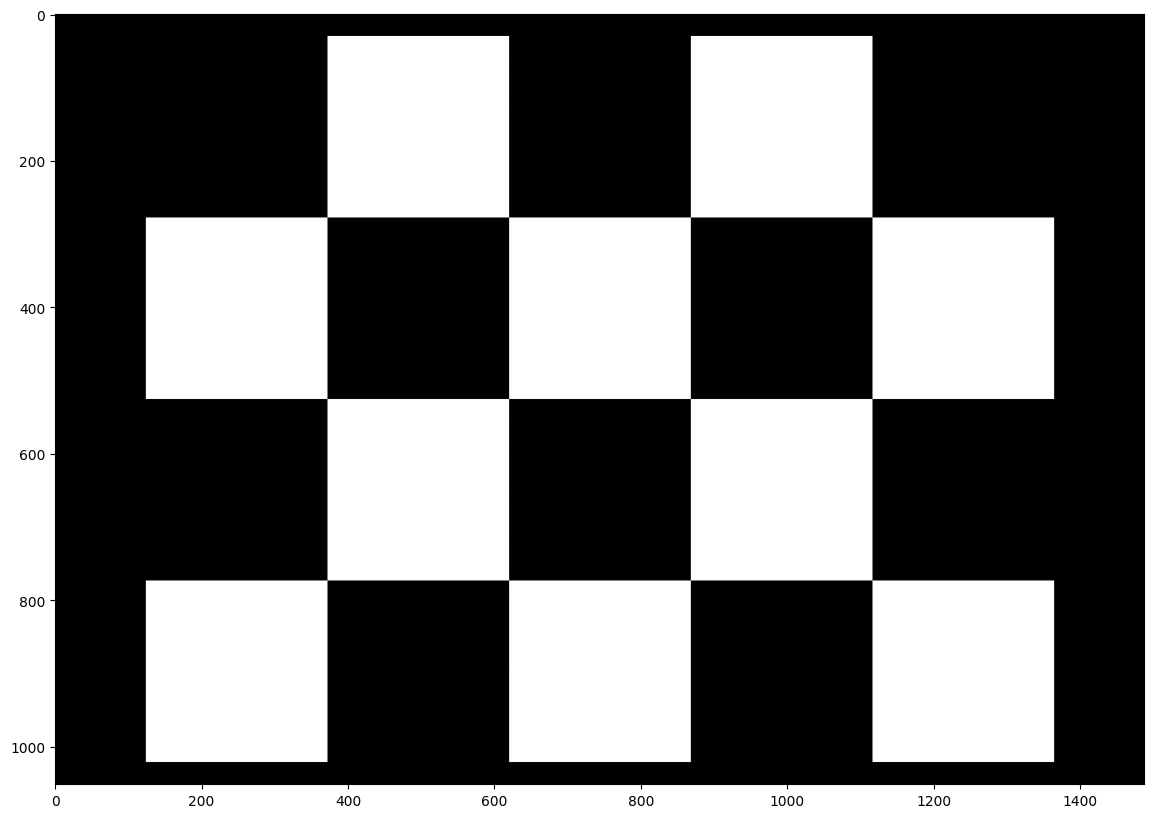

In [10]:
img = cv2.imread('data/checkerboard_clean.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

### Harris Corner Detector
Harris corner detector evaluates each image pixel for the so called "cornerness", i.e., it measures how much the neighbourhood of each pixel changes in different directions. Pixels, whose neighborhood changes both vertically and horizontally are considered corners (or corner candidates).

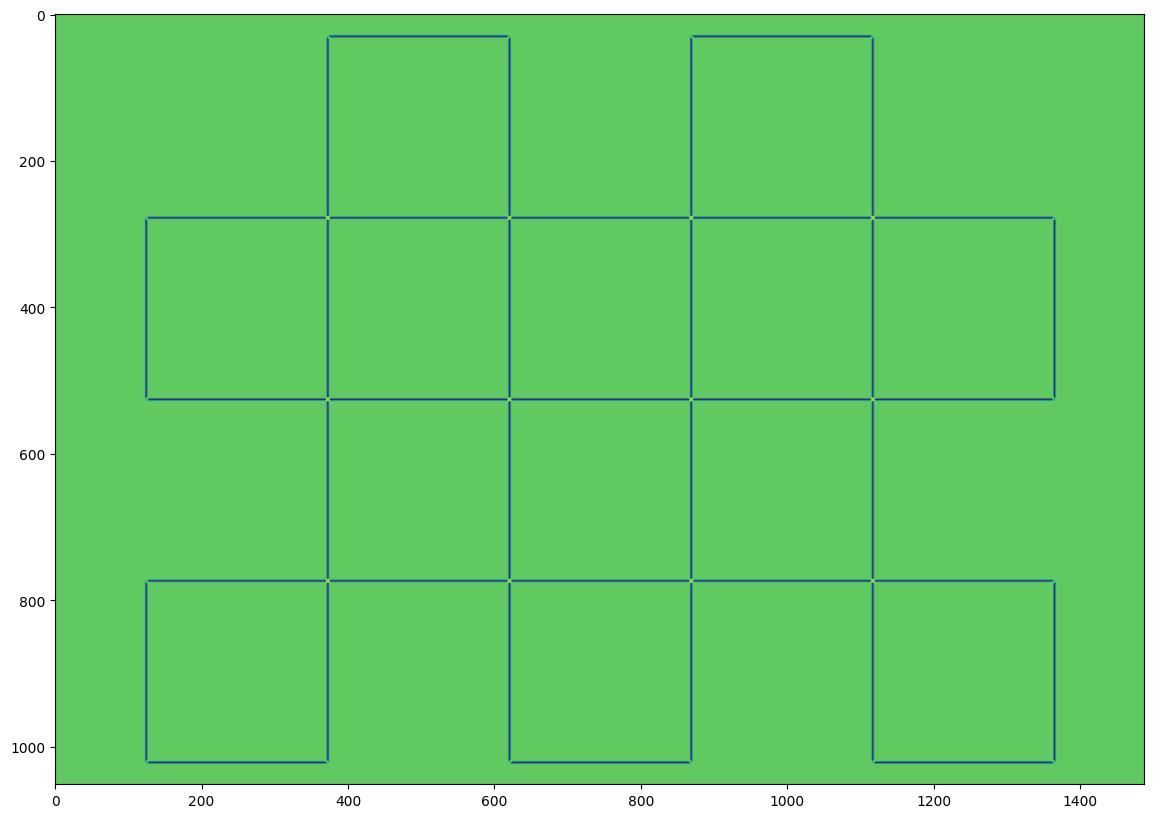

In [11]:
src = gray.astype(np.float32)
dst = cv2.cornerHarris(src, blockSize=2, ksize=11, k=0.04)
plt.imshow(dst)

Remember the cornerness equation: for edge pixel one of the eigenvalues (of the Harris matrix M) is very large and the other very small. This yields negative (with relatively large absolute value) cornerness index.

Let's us now print the detected corners on the original image.

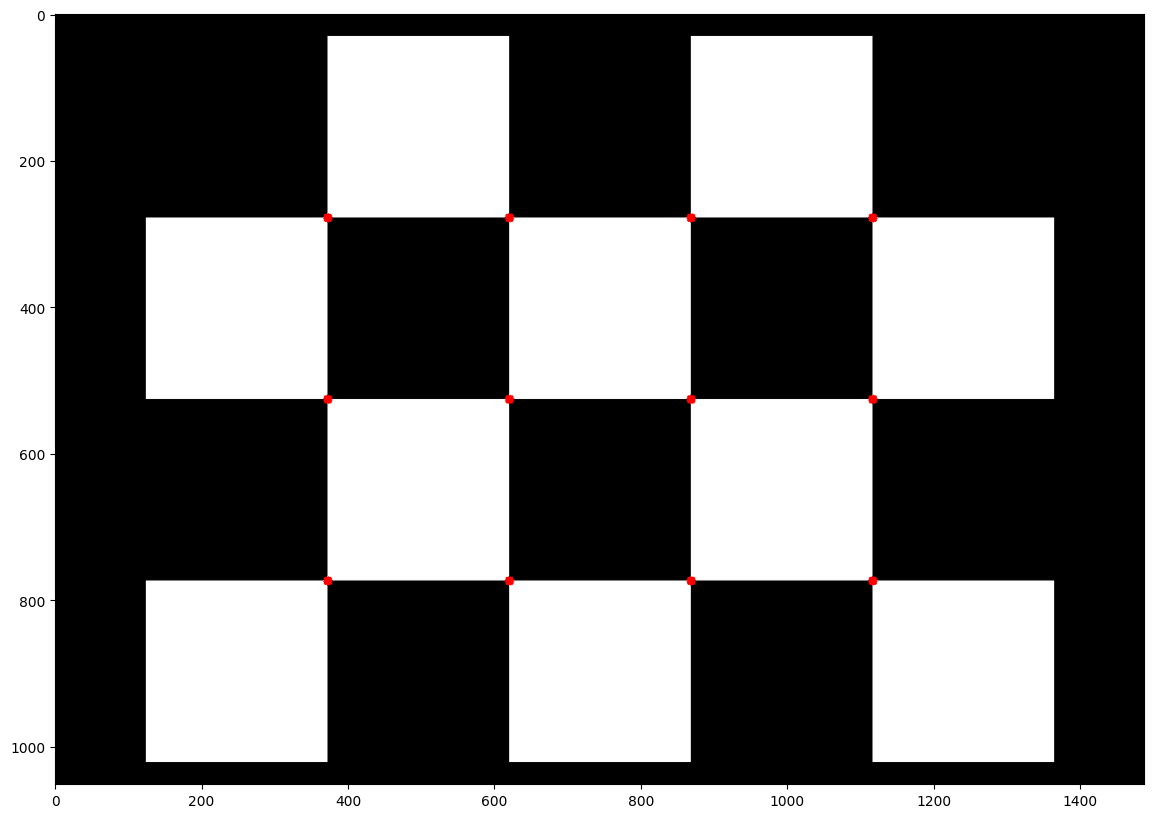

In [12]:
rows, cols = dst.shape
th = 0.9 * np.max(dst)
result = np.copy(img)

for r in range(rows):
    for c in range(cols):
        if dst[r, c] > th:
            result = cv2.circle(result, (c,r), 5, (255,0,0), -1)
            
plt.imshow(result)

(<Axes: >, <matplotlib.image.AxesImage at 0x1215ea120>)

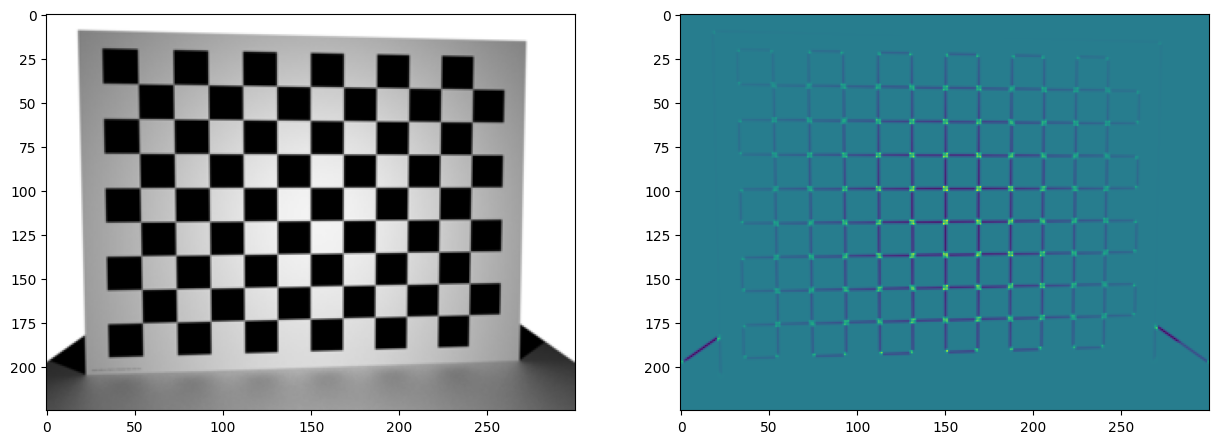

In [13]:
img = cv2.imread('data/checkerboard.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

src = gray.astype(np.float32)
dst = cv2.cornerHarris(src, blockSize=2, ksize=3, k=0.04)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)

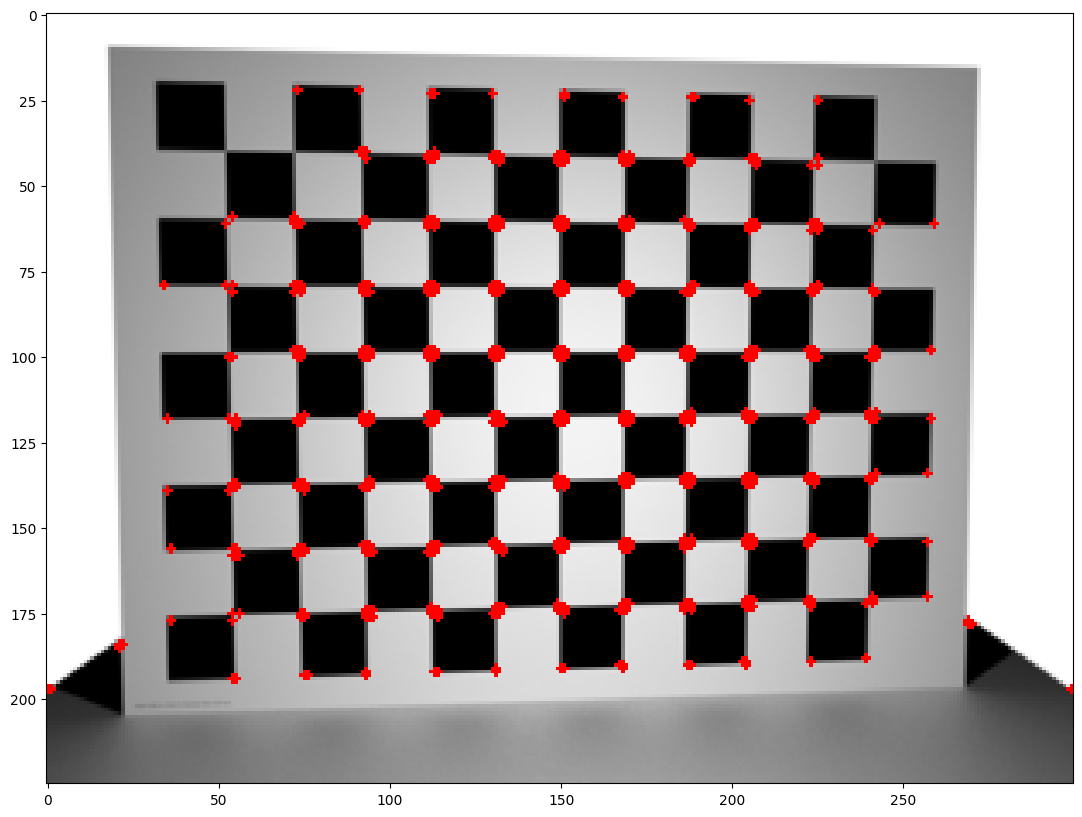

In [14]:
rows, cols = dst.shape
th = 0.2 * np.max(dst)
result = np.copy(img)

for r in range(rows):
    for c in range(cols):
        if dst[r, c] > th:
            result = cv2.circle(result, (c,r), 1, (255,0,0), -1)
            
plt.imshow(result)

Let's try the corner detector on parking cameras.

(<Axes: >, <matplotlib.image.AxesImage at 0x121756b70>)

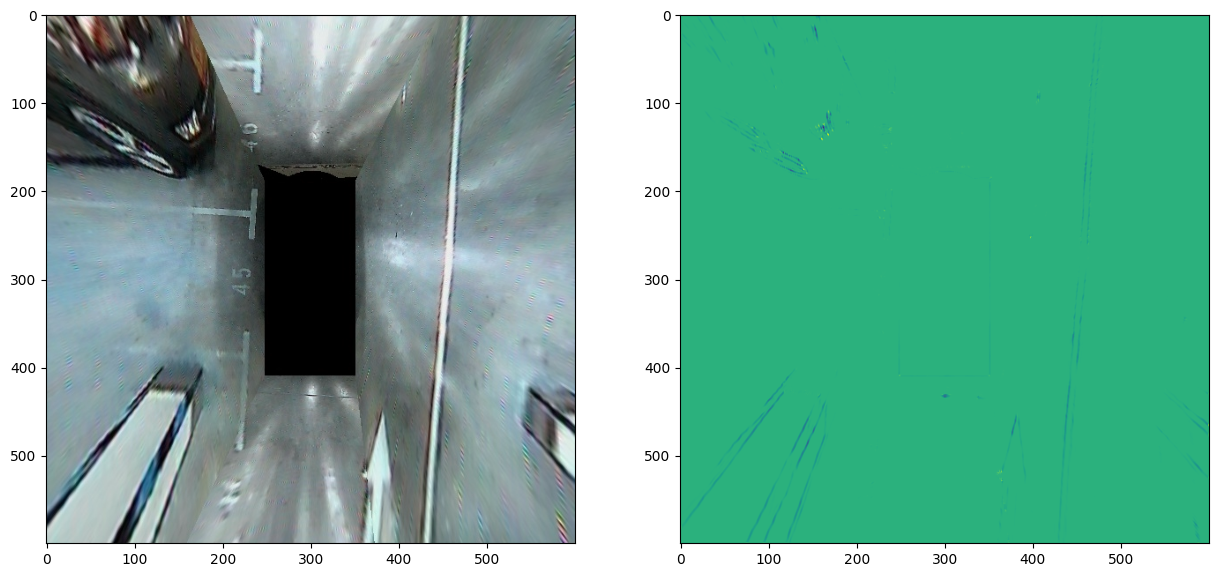

In [15]:
img = cv2.imread('data/parking.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

src = gray.astype(np.float32)
dst = cv2.cornerHarris(src, blockSize=2, ksize=3, k=0.04)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)

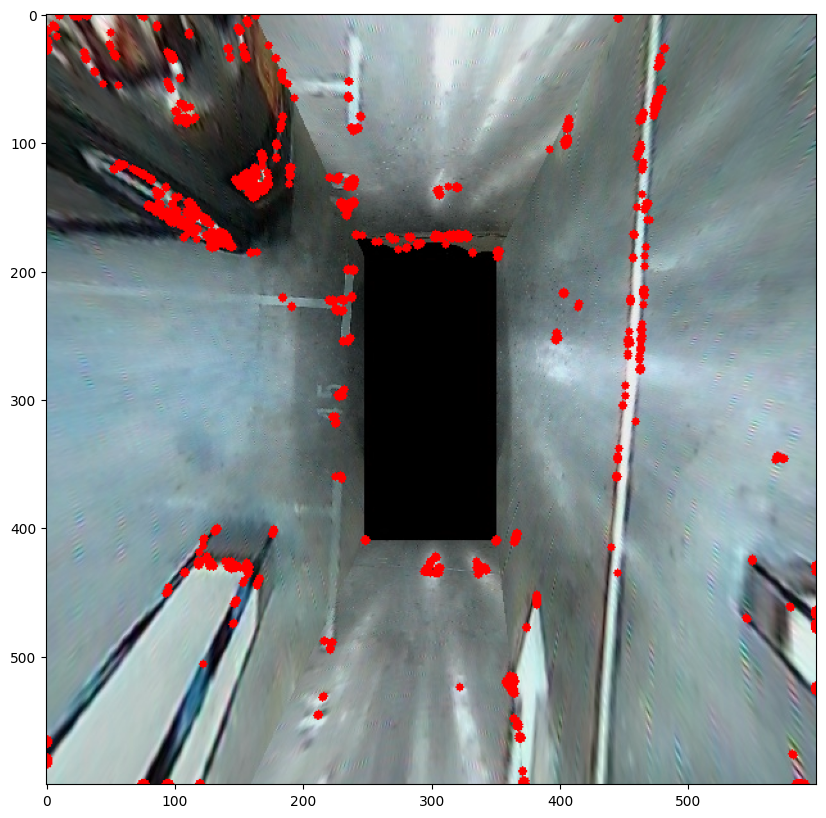

In [19]:
rows, cols = dst.shape
th = 0.01 * np.max(dst)   # Keep going down to 0.01 -> outliers
result = np.copy(img)

for r in range(rows):
    for c in range(cols):
        if dst[r, c] > th:
            result = cv2.circle(result, (c,r), 3, (255,0,0), -1)
            
plt.imshow(result)